# UCC in qiskit

Creating circuits in qiskit

In [1]:
# imports
import numpy as np

from qiskit import QuantumCircuit

Circuit with 2 qubits

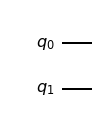

In [2]:
# 2 qubits
qc = QuantumCircuit(2)
qc.draw(output='mpl')

Adding gates to respective qubits

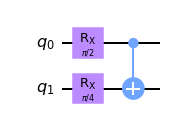

In [3]:
# 2 qubits
qc = QuantumCircuit(2)

# qubit 0
qc.rx(np.pi/2, 0)

# qubit 1
qc.rx(np.pi/4, 1)

# cnot gate
qc.cx(0, 1) # control qubit, x qubit

qc.draw(output='mpl')

Defining parameters in qiskit (which can be optimized)

In [4]:
from qiskit.circuit import Parameter

angle = Parameter('θ')

Full single excitation

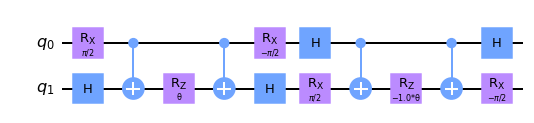

In [5]:
circuit = QuantumCircuit(2)

p = np.pi/2

circuit.rx(p, 0)        # x rotation
circuit.h(1)            # hadamard gate
circuit.cx(0,1)         # cnot ladder
circuit.rz(angle, 1)    # z rotation
circuit.cx(0,1)
circuit.rx(-p, 0)
circuit.h(1)

circuit.h(0)
circuit.rx(p, 1)
circuit.cx(0,1)
circuit.rz(-angle, 1)
circuit.cx(0,1)
circuit.h(0)
circuit.rx(-p, 1)

circuit.draw(output=("mpl"))

### Inbuilt functions

In [6]:
import tequila as tq
import qiskit

geom = "H 0.0 0.0 0.0\nH 0.0 0.0 0.7"
mol = tq.chemistry.Molecule( geometry=geom, basis_set="sto-3g", transformation="jordan_wigner")

In [7]:
# single excitation unitary
idx = [(0), (1)]
excitation_gate = mol.make_excitation_gate(idx, angle="s")
tq.draw(excitation_gate)

0: ───X^0.5────@─────────────────────────────────────@───X^-0.5───Y^-0.5───@─────────────────────────────────────@───Y^0.5────
               │                                     │                     │                                     │
1: ───Y^-0.5───X───Z^(0.318309886183791*f((s,))_0)───X───Y^0.5────X^0.5────X───Z^(0.318309886183791*f((s,))_1)───X───X^-0.5───


''

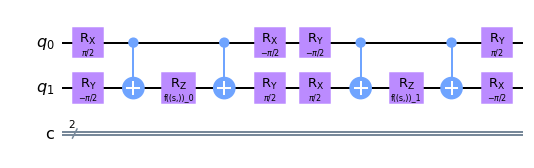

In [8]:
# single excitation unitary
idx = [(0), (1)]
excitation_gate = mol.make_excitation_gate(idx, angle="s")

qiskit_circuit = tq.compile(excitation_gate, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

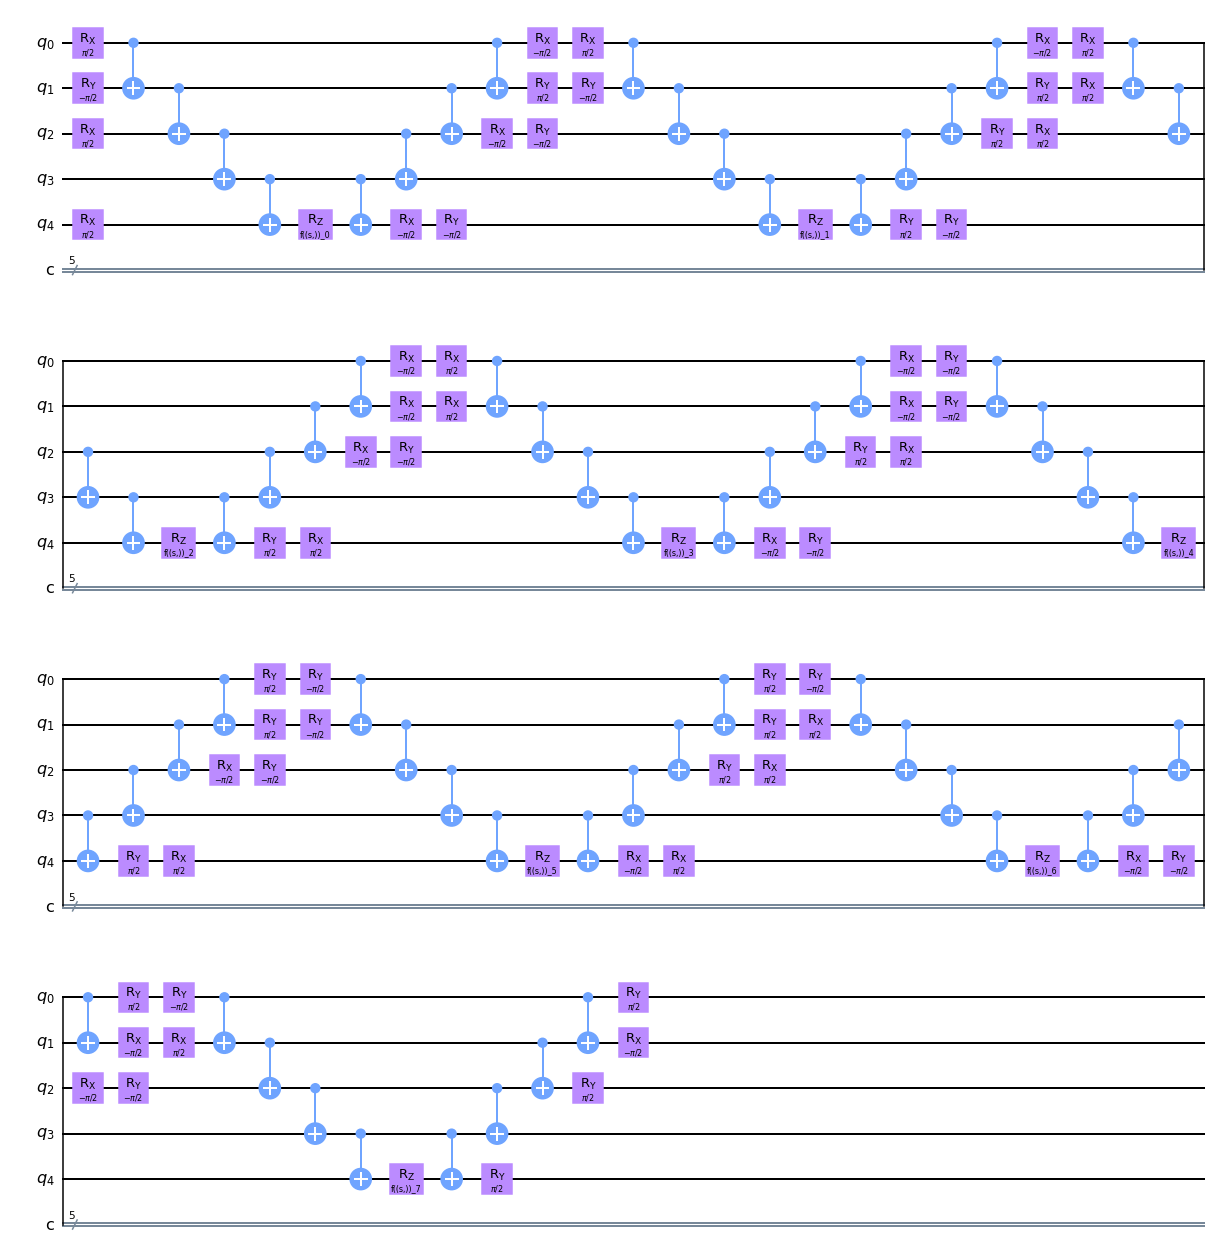

In [9]:
# double excitation unitary
idx = [(0,1), (2,4)]
excitation_gate = mol.make_excitation_gate(idx, angle="s")

qiskit_circuit = tq.compile(excitation_gate, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')